## Lesson 2 - Python Functions, Pandas and Matplotlib

Here will introduce Functions, Pandas, and Matplotlib. Pandas uses DataFrames (tables, much like R DataFrames) and Series (columns of a DataFrame) with powerful SQL-like queries. Matplotlib is a package for plotting, which uses a MATLAB-style syntax.



### Table of Contents

* [Functions](#functions)
* [Pandas](#pandas)
* [Matplotlib](#matplotlib)
* [Distribution Plots](#plots)

<a id="functions"></a>

### Functions

A function is a block of code which only runs when it is called.

You can pass data, known as parameters, into a function.

A function can return data as a result.

In [1]:
def call_me(s):
    print(s)

In [2]:
call_me("Yo Man!")

Yo Man!


In [3]:
# call function multiple times
call_me("David")
call_me("Hippo")
call_me("Emily")

David
Hippo
Emily


Return Values
To let a function return a value, use the return statement:

In [4]:
def call_me(s):
    return s

In [5]:
res = call_me("David")
res

'David'

In [6]:
def get_ntd_dollar(usd):
    return 32 * usd

print(get_ntd_dollar(100))

3200


In [7]:
def sum(a, b):
    s = 0
    s = a + b
    return s

sum(1, 2)

3

In [8]:
# once function is declared, we can re-use funtion in the whole python code
sum(1.3, 2.9)

4.2

Additionally, you can define functions to take `*x` and `**y` arguments. This allows a function to accept any number of positional and/or named arguments that aren't specifically named in the declaration. 

Example with `*` (positional arguments):

In [9]:
def sum(*values):
    s = 0
    for v in values:
        s = s + v
    return s

sum(1, 2, 3, 4, 5)

15

<a id="pandas"></a>

### Pandas

#### What is Pandas?

Pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series. 

#### Library features

* DataFrame object for data manipulation with integrated indexing
* Tools for reading and writing data between in-memory data structures and different file formats
* Data alignment and integrated handling of missing data
* Reshaping and pivoting of data sets
* Label-based slicing, fancy indexing, and subsetting of large data sets
* Data structure column insertion and deletion
* Group-by engine allowing split-apply-combine operations on data sets
* Data set merging and joining
* Hierarchical axis indexing to work with high-dimensional data in a lower-dimensional data structure
* Time series-functionality: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging

The library is highly optimized for performance, with critical code paths written in Cython or C.

#### Install packages

Install pandas and matplotlib using if you haven't already. If you're not sure, you can type `conda list` at a terminal prompt.

```
conda install pandas
conda install matplotlib
```

#### Import modules

In [10]:
import pandas
pandas.__version__

'0.25.3'

Just as we generally import NumPy under the alias ``np``, we will import Pandas under the alias ``pd``:

In [11]:
import pandas as pd

### Pandas Objects

At the very basic level, Pandas objects can be thought of as enhanced versions of NumPy structured arrays in which the rows and columns are identified with labels rather than simple integer indices.
As we will see during the course of this chapter, Pandas provides a host of useful tools, methods, and functionality on top of the basic data structures, but nearly everything that follows will require an understanding of what these structures are.
Thus, before we go any further, let's introduce these three fundamental Pandas data structures: the ``Series``, ``DataFrame``, and ``Index``.

We will start our code sessions with the standard NumPy and Pandas imports:

In [12]:
import numpy as np
import pandas as pd

### Pandas 基本資料結構

Pandas 有兩個基本資料結構:

* <b style="color:red;">DataFrame</b>: 可以想成一個表格。
* <b style="color:red;">Series</b>: 表格的某一列、某一行, 基本上就是我們以前的 list 或 array

一個 DataFrame, 我們有 `index` (列的名稱), `columns` (行的名稱)。

#### DataFrame

![DataFrame 的結構](images/indexcol.png)

#### The Pandas Series Object

A Pandas ``Series`` is a one-dimensional array of indexed data.
It can be created from a list or array as follows:

In [13]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [14]:
data = pd.Series(["David", "Emily", "Sean", "Kendy"])
data

0    David
1    Emily
2     Sean
3    Kendy
dtype: object

As we see in the output, the ``Series`` wraps both a sequence of values and a sequence of indices, which we can access with the ``values`` and ``index`` attributes.
The ``values`` are simply a familiar NumPy array:

In [15]:
data.values

array(['David', 'Emily', 'Sean', 'Kendy'], dtype=object)

The ``index`` is an array-like object of type ``pd.Index``, which we'll discuss in more detail momentarily.

In [16]:
data.index

RangeIndex(start=0, stop=4, step=1)

Like with a NumPy array, data can be accessed by the associated index via the familiar Python square-bracket notation:

In [17]:
data[1]

'Emily'

In [18]:
data[1:3]

1    Emily
2     Sean
dtype: object

As we will see, though, the Pandas ``Series`` is much more general and flexible than the one-dimensional NumPy array that it emulates.

#### ``Series`` as generalized NumPy array

From what we've seen so far, it may look like the ``Series`` object is basically interchangeable with a one-dimensional NumPy array.
The essential difference is the presence of the index: while the Numpy Array has an *implicitly defined* integer index used to access the values, the Pandas ``Series`` has an *explicitly defined* index associated with the values.

This explicit index definition gives the ``Series`` object additional capabilities. For example, the index need not be an integer, but can consist of values of any desired type.
For example, if we wish, we can use strings as an index:

In [19]:
data = pd.Series(["David", "Emily", "Sean", "Kendy"],
                 index=['2019', '2020', '2021', '2022'])
data

2019    David
2020    Emily
2021     Sean
2022    Kendy
dtype: object

In [20]:
data["2019"]

'David'

And the item access works as expected:

In [21]:
# data['2023']

# We can even use non-contiguous or non-sequential indices:

In [22]:
data = pd.Series(["David", "Emily", "Sean", "Kendy"],
                 index=[2, 5, 3, 7])
data

2    David
5    Emily
3     Sean
7    Kendy
dtype: object

In [23]:
data[3]

'Sean'

### Series as specialized dictionary

In this way, you can think of a Pandas ``Series`` a bit like a specialization of a Python dictionary.
A dictionary is a structure that maps arbitrary keys to a set of arbitrary values, and a ``Series`` is a structure which maps typed keys to a set of typed values.
This typing is important: just as the type-specific compiled code behind a NumPy array makes it more efficient than a Python list for certain operations, the type information of a Pandas ``Series`` makes it much more efficient than Python dictionaries for certain operations.

The ``Series``-as-dictionary analogy can be made even more clear by constructing a ``Series`` object directly from a Python dictionary:

In [24]:
# 人口
population_dict = {'台北': 38332521,
                   '台中': 26448193,
                   '高雄': 19651127,
                   '基隆': 19552860,
                   '台南': 12882135}
population = pd.Series(population_dict)
population

台北    38332521
台中    26448193
高雄    19651127
基隆    19552860
台南    12882135
dtype: int64

By default, a ``Series`` will be created where the index is drawn from the sorted keys.
From here, typical dictionary-style item access can be performed:

In [25]:
population['台北']

38332521

Unlike a dictionary, though, the ``Series`` also supports array-style operations such as slicing:

In [26]:
# start with index California , end of index Illinois
population['台北':'台中']

台北    38332521
台中    26448193
dtype: int64

### Constructing Series objects

We've already seen a few ways of constructing a Pandas ``Series`` from scratch; all of them are some version of the following:

```python
>>> pd.Series(data, index=index)
```

where ``index`` is an optional argument, and ``data`` can be one of many entities.

For example, ``data`` can be a list or NumPy array, in which case ``index`` defaults to an integer sequence:

In [27]:
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

``data`` can be a scalar, which is repeated to fill the specified index:

In [28]:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

``data`` can be a dictionary, in which ``index`` defaults to the sorted dictionary keys:

In [29]:
pd.Series({2:'a', 1:'b', 3:'c'})

2    a
1    b
3    c
dtype: object

In each case, the index can be explicitly set if a different result is preferred:

In [30]:
data = pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2])
data

3    c
2    a
dtype: object

Notice that in this case, the ``Series`` is populated only with the explicitly identified keys.

### The Pandas DataFrame Object

The next fundamental structure in Pandas is the ``DataFrame``.
Like the ``Series`` object discussed in the previous section, the ``DataFrame`` can be thought of either as a generalization of a NumPy array, or as a specialization of a Python dictionary.
We'll now take a look at each of these perspectives.

#### DataFrame as a generalized NumPy array
If a ``Series`` is an analog of a one-dimensional array with flexible indices, a ``DataFrame`` is an analog of a two-dimensional array with both flexible row indices and flexible column names.
Just as you might think of a two-dimensional array as an ordered sequence of aligned one-dimensional columns, you can think of a ``DataFrame`` as a sequence of aligned ``Series`` objects.
Here, by "aligned" we mean that they share the same index.

To demonstrate this, let's first construct a new ``Series`` listing the area of each of the five states discussed in the previous section:

In [31]:
# 面積
area_dict = {'台北': 423967, '台中': 695662, '高雄': 141297,
             '基隆': 170312, '台南': 149995}
area = pd.Series(area_dict)
area

台北    423967
台中    695662
高雄    141297
基隆    170312
台南    149995
dtype: int64

Now that we have this along with the ``population`` Series from before, we can use a dictionary to construct a single two-dimensional object containing this information:

In [32]:
states = pd.DataFrame({'人口': population,
                       '面積': area})
states

,人口,面積
台北,38332521,423967
台中,26448193,695662
高雄,19651127,141297
基隆,19552860,170312
台南,12882135,149995


In [33]:
states

,人口,面積
台北,38332521,423967
台中,26448193,695662
高雄,19651127,141297
基隆,19552860,170312
台南,12882135,149995


Like the ``Series`` object, the ``DataFrame`` has an ``index`` attribute that gives access to the index labels:

In [34]:
states.index

Index(['台北', '台中', '高雄', '基隆', '台南'], dtype='object')

Additionally, the ``DataFrame`` has a ``columns`` attribute, which is an ``Index`` object holding the column labels:

In [35]:
states.columns

Index(['人口', '面積'], dtype='object')

Thus the ``DataFrame`` can be thought of as a generalization of a two-dimensional NumPy array, where both the rows and columns have a generalized index for accessing the data.

### DataFrame as specialized dictionary

Similarly, we can also think of a ``DataFrame`` as a specialization of a dictionary.
Where a dictionary maps a key to a value, a ``DataFrame`` maps a column name to a ``Series`` of column data.
For example, asking for the ``'area'`` attribute returns the ``Series`` object containing the areas we saw earlier:

In [36]:
states['人口']

台北    38332521
台中    26448193
高雄    19651127
基隆    19552860
台南    12882135
Name: 人口, dtype: int64

Notice the potential point of confusion here: in a two-dimesnional NumPy array, ``data[0]`` will return the first *row*. For a ``DataFrame``, ``data['col0']`` will return the first *column*.
Because of this, it is probably better to think about ``DataFrame``s as generalized dictionaries rather than generalized arrays, though both ways of looking at the situation can be useful.
We'll explore more flexible means of indexing ``DataFrame``s in [Data Indexing and Selection](03.02-Data-Indexing-and-Selection.ipynb).

### Constructing DataFrame objects

A Pandas ``DataFrame`` can be constructed in a variety of ways.
Here we'll give several examples.

#### From a single Series object

A ``DataFrame`` is a collection of ``Series`` objects, and a single-column ``DataFrame`` can be constructed from a single ``Series``:

In [37]:
pd.DataFrame(population, columns=['人口1'])

,人口1
台北,38332521
台中,26448193
高雄,19651127
基隆,19552860
台南,12882135


#### From a list of dicts

Any list of dictionaries can be made into a ``DataFrame``.
We'll use a simple list comprehension to create some data:

In [38]:
lst = [{"興趣":"打球", "年齡":"21", "性別":"男生"},{"興趣":"電影", "年齡":"23", "性別":"女生", "地區":"台北"}]
pd.DataFrame(lst)

,興趣,年齡,性別,地區
0,打球,21,男生,NaN
1,電影,23,女生,台北


Even if some keys in the dictionary are missing, Pandas will fill them in with ``NaN`` (i.e., "not a number") values:

In [39]:
lst = [{"年齡":"21", "性別":"男生"},{"興趣":"電影", "性別":"女生"}]
pd.DataFrame(lst)

,年齡,性別,興趣
0,21,男生,NaN
1,NaN,女生,電影


#### From a dictionary of Series objects

As we saw before, a ``DataFrame`` can be constructed from a dictionary of ``Series`` objects as well:

In [40]:
# population and area are both dictionary
pd.DataFrame({'人口': population,
              '面積': area})

,人口,面積
台北,38332521,423967
台中,26448193,695662
高雄,19651127,141297
基隆,19552860,170312
台南,12882135,149995


#### From a two-dimensional NumPy array

Given a two-dimensional array of data, we can create a ``DataFrame`` with any specified column and index names.
If omitted, an integer index will be used for each:

In [41]:
person1 = ["男生","1980","籃球"]
person2 = ["女生","1998","羽球"]
person3 = ["男生","1991","足球"]

person4 = ["女生","1997","桌球"]
person5 = ["女生","2000","板球"]
person6 = ["男生","1982","游泳"]

classroom = []
group1 =[]
group1.append(person1)
group1.append(person2)
group1.append(person3)

group2 = []
group2.append(person4)
group2.append(person5)
group2.append(person6)
# append list of list
classroom.append(group1)
classroom.append(group2)
  
df1 = pd.DataFrame(group1,
                   columns=['性別', '生日', '專長'],
                   index=['a', 'b', 'c'])

df2 = pd.DataFrame(group2,
                   columns=['性別', '生日', '專長'],
                   index=['a', 'b', 'c'])

In [42]:
df1

,性別,生日,專長
a,男生,1980,籃球
b,女生,1998,羽球
c,男生,1991,足球


In [43]:
df2

,性別,生日,專長
a,女生,1997,桌球
b,女生,2000,板球
c,男生,1982,游泳


In [44]:
df = df1 + df2

In [45]:
# 這是錯誤的
df

,性別,生日,專長
a,男生女生,19801997,籃球桌球
b,女生女生,19982000,羽球板球
c,男生男生,19911982,足球游泳


In [46]:
# index 有著重複的 a, b, c
df = df1.append(df2)
df

,性別,生日,專長
a,男生,1980,籃球
b,女生,1998,羽球
c,男生,1991,足球
a,女生,1997,桌球
b,女生,2000,板球
c,男生,1982,游泳


In [47]:
# 讓 index 不重複
df1 = pd.DataFrame(group1,
                   columns=['性別', '生日', '專長'],
                   index=['a', 'b', 'c'])

df2 = pd.DataFrame(group2,
                   columns=['性別', '生日', '專長'],
                   index=['d', 'e', 'f'])

In [48]:
df = df1.append(df2)
df

,性別,生日,專長
a,男生,1980,籃球
b,女生,1998,羽球
c,男生,1991,足球
d,女生,1997,桌球
e,女生,2000,板球
f,男生,1982,游泳


## Data Indexing and Selection

### Data Selection in Series

As we saw in the previous section, a ``Series`` object acts in many ways like a one-dimensional NumPy array, and in many ways like a standard Python dictionary.
If we keep these two overlapping analogies in mind, it will help us to understand the patterns of data indexing and selection in these arrays.

### Series as dictionary

Like a dictionary, the ``Series`` object provides a mapping from a collection of keys to a collection of values:

In [49]:
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [50]:
data['b']

0.5

We can also use dictionary-like Python expressions and methods to examine the keys/indices and values:

In [51]:
'a' in data

True

In [52]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [53]:
# series to list
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

``Series`` objects can even be modified with a dictionary-like syntax.
Just as you can extend a dictionary by assigning to a new key, you can extend a ``Series`` by assigning to a new index value:

In [54]:
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

### Series as one-dimensional array

A ``Series`` builds on this dictionary-like interface and provides array-style item selection via the same basic mechanisms as NumPy arrays – that is, *slices*, *masking*, and *fancy indexing*.
Examples of these are as follows:

In [55]:
# slicing by explicit index
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [56]:
# slicing by implicit integer index
data[0:2]

a    0.25
b    0.50
dtype: float64

In [57]:
# masking
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [58]:
# fancy indexing, by []
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

Among these, slicing may be the source of the most confusion.
Notice that when slicing with an explicit index (i.e., ``data['a':'c']``), the final index is *included* in the slice, while when slicing with an implicit index (i.e., ``data[0:2]``), the final index is *excluded* from the slice.

### Indexers: loc, iloc, and ix

These slicing and indexing conventions can be a source of confusion.
For example, if your ``Series`` has an explicit integer index, an indexing operation such as ``data[1]`` will use the explicit indices, while a slicing operation like ``data[1:3]`` will use the implicit Python-style index.

In [59]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [60]:
# explicit index when indexing
data[1]

'a'

In [61]:
# implicit index when slicing, notice that there is only 3 elements, but set 10th, not including 0 as well
data[1:10]

3    b
5    c
dtype: object

Because of this potential confusion in the case of integer indexes, Pandas provides some special *indexer* attributes that explicitly expose certain indexing schemes.
These are not functional methods, but attributes that expose a particular slicing interface to the data in the ``Series``.

First, the ``loc`` attribute allows indexing and slicing that always references the explicit index:

In [62]:
data.loc[1]

'a'

In [63]:
data.loc[1:2]

1    a
dtype: object

The ``iloc`` attribute allows indexing and slicing that always references the implicit Python-style index:

In [64]:
print(data.iloc[0])
print(data.iloc[1])
print(data.iloc[2])

a
b
c


In [65]:
data.iloc[1:3]

3    b
5    c
dtype: object

A third indexing attribute, ``ix``, is a hybrid of the two, and for ``Series`` objects is equivalent to standard ``[]``-based indexing.
The purpose of the ``ix`` indexer will become more apparent in the context of ``DataFrame`` objects, which we will discuss in a moment.

One guiding principle of Python code is that "explicit is better than implicit."
The explicit nature of ``loc`` and ``iloc`` make them very useful in maintaining clean and readable code; especially in the case of integer indexes, I recommend using these both to make code easier to read and understand, and to prevent subtle bugs due to the mixed indexing/slicing convention.

### Data Selection in DataFrame

Recall that a ``DataFrame`` acts in many ways like a two-dimensional or structured array, and in other ways like a dictionary of ``Series`` structures sharing the same index.
These analogies can be helpful to keep in mind as we explore data selection within this structure.

#### DataFrame as a dictionary

The first analogy we will consider is the ``DataFrame`` as a dictionary of related ``Series`` objects.
Let's return to our example of areas and populations of states:

In [66]:
area = pd.Series({'台北': 423967, '基隆': 695662,
                  '台中': 141297, '台南': 170312,
                  '高雄': 149995})
pop = pd.Series({'台北': 38332521, '基隆': 26448193,
                 '台中': 19651127, '台南': 19552860,
                 '高雄': 12882135})
data = pd.DataFrame({'面積':area, '人口':pop})
data

,面積,人口
台北,423967,38332521
基隆,695662,26448193
台中,141297,19651127
台南,170312,19552860
高雄,149995,12882135


In [67]:
area = pd.Series({'台北': 423967, '基隆': 695662,
                  '台中': 141297, '台南': 170312,
                  '高雄': 149995,
                  '宜蘭': 323000})
pop = pd.Series({'台北': 38332521, '基隆': 26448193,
                 '台中': 19651127, '台南': 19552860,
                 '高雄': 12882135})
data = pd.DataFrame({'面積':area, '人口':pop})
data

,面積,人口
台中,141297,19651127.0
台北,423967,38332521.0
台南,170312,19552860.0
基隆,695662,26448193.0
宜蘭,323000,NaN
高雄,149995,12882135.0


The individual ``Series`` that make up the columns of the ``DataFrame`` can be accessed via dictionary-style indexing of the column name:

In [68]:
data['面積']

台中    141297
台北    423967
台南    170312
基隆    695662
宜蘭    323000
高雄    149995
Name: 面積, dtype: int64

Equivalently, we can use attribute-style access with column names that are strings:

In [69]:
data.面積

台中    141297
台北    423967
台南    170312
基隆    695662
宜蘭    323000
高雄    149995
Name: 面積, dtype: int64

This attribute-style column access actually accesses the exact same object as the dictionary-style access:

In [70]:
data.面積 is data['面積']

True

Though this is a useful shorthand, keep in mind that it does not work for all cases!
For example, if the column names are not strings, or if the column names conflict with methods of the ``DataFrame``, this attribute-style access is not possible.
For example, the ``DataFrame`` has a ``pop()`` method, so ``data.pop`` will point to this rather than the ``"pop"`` column:

In [71]:
data.人口

台中    19651127.0
台北    38332521.0
台南    19552860.0
基隆    26448193.0
宜蘭           NaN
高雄    12882135.0
Name: 人口, dtype: float64

In [72]:
data['人口']

台中    19651127.0
台北    38332521.0
台南    19552860.0
基隆    26448193.0
宜蘭           NaN
高雄    12882135.0
Name: 人口, dtype: float64

In [73]:
data.pop is data['人口']

False

In particular, you should avoid the temptation to try column assignment via attribute (i.e., use ``data['pop'] = z`` rather than ``data.pop = z``).

Like with the ``Series`` objects discussed earlier, this dictionary-style syntax can also be used to modify the object, in this case adding a new column:

In [74]:
data['密度'] = data['人口'] / data['面積']
data

,面積,人口,密度
台中,141297,19651127.0,139.076746
台北,423967,38332521.0,90.413926
台南,170312,19552860.0,114.806121
基隆,695662,26448193.0,38.018740
宜蘭,323000,NaN,NaN
高雄,149995,12882135.0,85.883763


and passing a single "index" to a ``DataFrame`` accesses a column:

In [75]:
data['面積']

台中    141297
台北    423967
台南    170312
基隆    695662
宜蘭    323000
高雄    149995
Name: 面積, dtype: int64

Thus for array-style indexing, we need another convention.
Here Pandas again uses the ``loc``, ``iloc``, and ``ix`` indexers mentioned earlier.
Using the ``iloc`` indexer, we can index the underlying array as if it is a simple NumPy array (using the implicit Python-style index), but the ``DataFrame`` index and column labels are maintained in the result:

In [76]:
data.iloc[:3, :2]

,面積,人口
台中,141297,19651127.0
台北,423967,38332521.0
台南,170312,19552860.0


Similarly, using the ``loc`` indexer we can index the underlying data in an array-like style but using the explicit index and column names:

In [77]:
# [0]: index, [1] is column
data.loc[:'台北', '人口':'密度']

,人口,密度
台中,19651127.0,139.076746
台北,38332521.0,90.413926


Keep in mind that for integer indices, the ``ix`` indexer is subject to the same potential sources of confusion as discussed for integer-indexed ``Series`` objects.

Any of the familiar NumPy-style data access patterns can be used within these indexers.
For example, in the ``loc`` indexer we can combine masking and fancy indexing as in the following:

In [78]:
data.loc[data.密度 > 100, ['人口', '密度']]

,人口,密度
台中,19651127.0,139.076746
台南,19552860.0,114.806121


Any of these indexing conventions may also be used to set or modify values; this is done in the standard way that you might be accustomed to from working with NumPy:

In [79]:
data.iloc[0, 2] = 91
data

,面積,人口,密度
台中,141297,19651127.0,91.000000
台北,423967,38332521.0,90.413926
台南,170312,19552860.0,114.806121
基隆,695662,26448193.0,38.018740
宜蘭,323000,NaN,NaN
高雄,149995,12882135.0,85.883763


To build up your fluency in Pandas data manipulation, I suggest spending some time with a simple ``DataFrame`` and exploring the types of indexing, slicing, masking, and fancy indexing that are allowed by these various indexing approaches.

### Additional indexing conventions

There are a couple extra indexing conventions that might seem at odds with the preceding discussion, but nevertheless can be very useful in practice.
First, while *indexing* refers to columns, *slicing* refers to rows:

In [80]:
data['台北':'台南']

,面積,人口,密度
台北,423967,38332521.0,90.413926
台南,170312,19552860.0,114.806121


Such slices can also refer to rows by number rather than by index:

In [81]:
data[1:3]

,面積,人口,密度
台北,423967,38332521.0,90.413926
台南,170312,19552860.0,114.806121


Similarly, direct masking operations are also interpreted row-wise rather than column-wise:

In [82]:
data[data.密度 > 100]

,面積,人口,密度
台南,170312,19552860.0,114.806121


These two conventions are syntactically similar to those on a NumPy array, and while these may not precisely fit the mold of the Pandas conventions, they are nevertheless quite useful in practice.

<a id="matplotlib"></a>
# Visualization with Matplotlib

Python 畫圖的指令, 我們最需要學只有兩個:

1. `plt.plot`
2. `plt.scatter`

我們先來試 `plt.plot`。

In [83]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

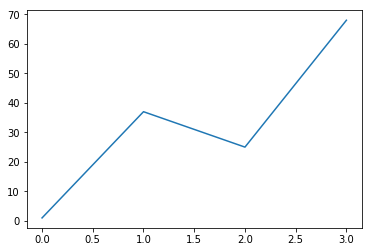

In [84]:
plt.plot([1, 37, 25, 68])

這其實就是把 y 座標為 1, 37, 25, 68 的點, 補上 x 座標 0, 1, 2, 3 連起來的折線圖。這是 Python 最基本的畫圖法。

再看一個例子；

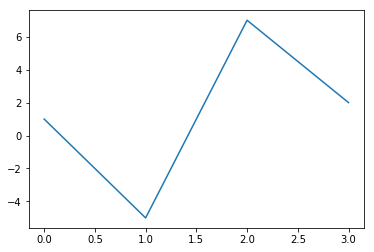

In [85]:
#(0,3), (1, -5), (2,7), (3,2)
plt.plot([1,-5,7,2])

如果 x 座標也自己給的話, 也就是比較完整的畫圖方式是

    plt.plot(X, Y)

其中 X 是點的 x 座標(list) ; Y 是點的 y 座標(list)。

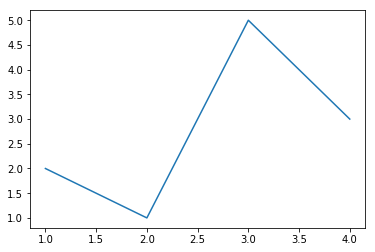

In [86]:
# 座標：(1,2), (2,1), (3,5), (4,3)
x_list = [1,2,3,4]
y_list = [2,1,5,3]
plt.plot(x_list, y_list)

比如說, 最常見的是, 我們畫一個函數, 就會決定 x 的範圍、要有多少個點, 再把我們要畫的函數畫出來。比方說我們想畫:

$$f(x) = \operatorname{a}(x)+b,$$

x 的範圍是 1 到 10, 取 10 個點，套用線性公式得到y，公式是這樣的：

In [87]:
def ax_plus_b(x, a, b):
    y = a*x+b
    return y

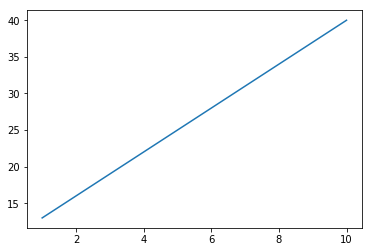

In [88]:
x_list = []
y_list = []
for x in range(10):
    a = 3
    b = 10
    x = x+1
    y = ax_plus_b(x, a, b)
    x_list.append(x)
    y_list.append(y)
plt.plot(x_list, y_list)

# Numpy 和陣列

Numpy很像 `list` 的 `array`

1. 使用和建構 `list`
2. `if` 條件判斷
3. 在 Python 讀入套件的正規方式
4. 開始用 `numpy`

### 以 `list` 型態紀錄成績

#### 計算平均

全班同學數學成績期中考成績如下, 請幫全班計算平均。

    grades = [77, 85, 56, 90, 66]
    
請計算平均。

In [89]:
s = 0 
grades = [74, 86, 60, 91, 66, 88]
for i in grades:
    s = s + i # s += i
print("average = {:.2f}".format(s/len(grades)))

average = 77.50


#### 使用 `append` 加一個元素進我們的 list

In [90]:
grades = []
grades.append(77)
grades.append(88)
grades

[77, 88]

#### 套件 numpy 讀入方式

```python
import numpy
```

套件「標準」縮寫方式如下：

```python
import numpy as np
```

In [91]:
import numpy as np

In [92]:
# 將 list 型別轉成 numpy 型態
grades = [74, 86, 60, 91, 66, 88]
grades_np = np.array(grades)

In [93]:
## 以 list 型態透過 numpy 計算平均分數
grades = [74, 86, 60, 91, 66, 88]
## 平均分
np.average(grades)

77.5

In [94]:
# 最高分 - 使用 list
np.max(grades)

91

In [95]:
# 全班標準差 - 使用 list
np.std(grades)

11.658330355015107

In [96]:
# 最低分 - 使用 list
np.min(grades)

60

In [97]:
# 但這不是我們要的，我們需要將分數轉成 numpy 型態，計算mean()
grades_np.mean()

77.5

In [98]:
# 計算 numpy 物件總和
grades_np.sum()

465

In [99]:
# 最高分 - 使用 numpy
grades_np.max()

91

In [100]:
# 最低分 - 使用 numpy
grades_np.min()

60

<a id="plots"></a>
## Distribution Plots
* distplot
* jointplot
* pairplot
* rugplot
* kdeplot

### DistPlot
The distplot shows the distribution of a univariate set of observations.

In [101]:
import seaborn as sns

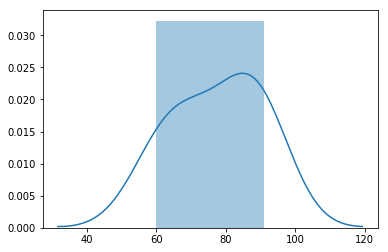

In [102]:
# 查看成績分佈
sns.distplot(grades_np)

In [103]:
# 但上張圖的分佈顯示，看不出哪個科目，所以改以 list of dictionary，多執行幾次這個cell產生更多學生成績
grades = []
student1 = {"國文":74, "英文":86, "數學":60, "物理":98, "化學":69, "體育":88, "性別":"男生"}
student2 = {"國文":91, "英文":82, "數學":82, "物理":91, "化學":87, "體育":72, "性別":"男生"}
student3 = {"國文":83, "英文":92, "數學":95, "物理":68, "化學":74, "體育":93, "性別":"女生"}
student4 = {"國文":67, "英文":76, "數學":76, "物理":81, "化學":97, "體育":75, "性別":"女生"}
student5 = {"國文":94, "英文":65, "數學":69, "物理":79, "化學":64, "體育":98, "性別":"女生"}
grades.append(student1)
grades.append(student2)
grades.append(student3)
grades.append(student4)
grades.append(student5)
df_grades = pd.DataFrame(grades)
df_grades

,國文,英文,數學,物理,化學,體育,性別
0,74,86,60,98,69,88,男生
1,91,82,82,91,87,72,男生
2,83,92,95,68,74,93,女生
3,67,76,76,81,97,75,女生
4,94,65,69,79,64,98,女生


In [104]:
import seaborn as sns
%matplotlib inline

from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\kaiu.ttf',size=14)
sns.set(font=myfont.get_name())

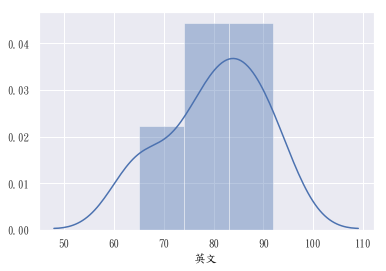

In [105]:
# Density Plot
sns.distplot(df_grades['英文'])

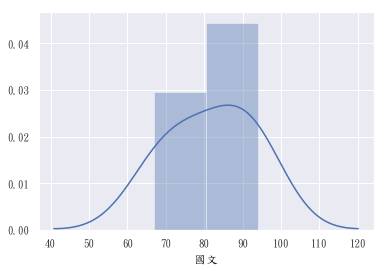

In [106]:
sns.distplot(df_grades['國文'])

##### To remove the KDE set kde parameter to false and to set bins set value of bins accordingly
sns.distplot(df_grades['英文'],kde=False,bins=1)

### Jointplot
jointplot() allows you to basically match up two distplots for bivariate data

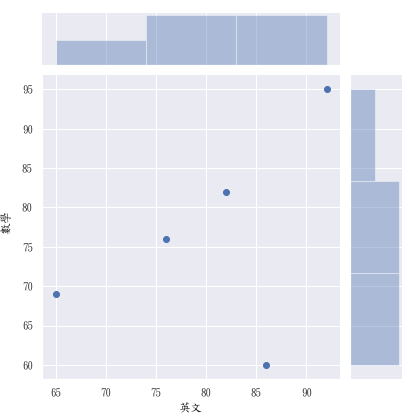

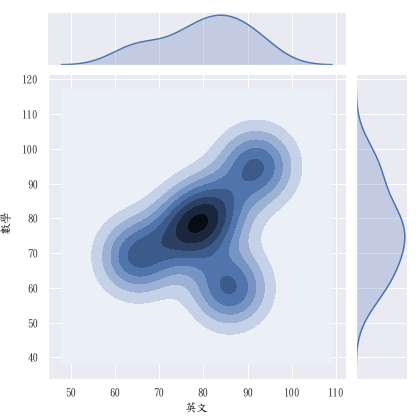

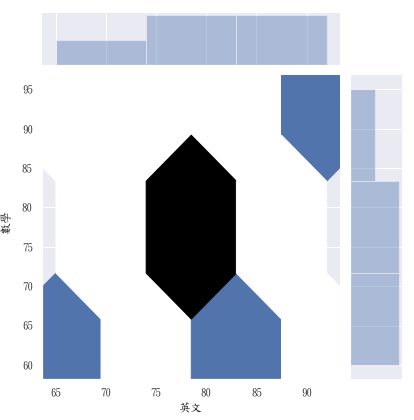

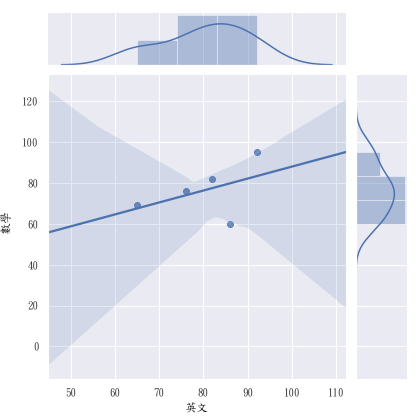

In [107]:
# Various kind paramaters scatter , reg, resid, kde, hex
sns.jointplot(x='英文', y='數學', data=df_grades, kind='scatter')
sns.jointplot(x='英文', y='數學', data=df_grades, kind='kde')
sns.jointplot(x='英文', y='數學', data=df_grades, kind='hex')
sns.jointplot(x='英文', y='數學', data=df_grades, kind='reg')

### pairplot
pairplot will plot pairwise relationships across an entire dataframe (for all the numerical columns) and supports a color hue argument (for categorical columns)

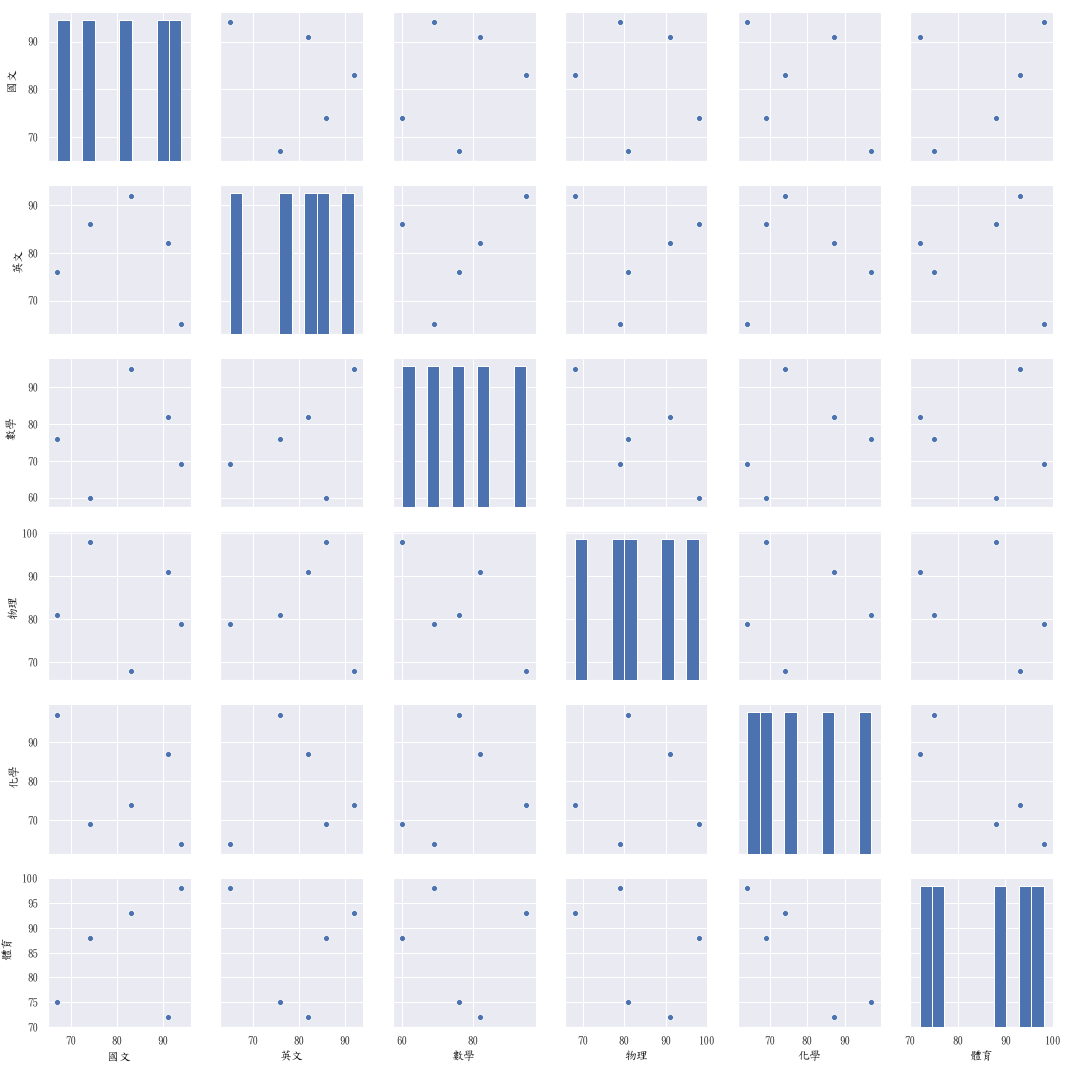

In [108]:
sns.pairplot(df_grades)

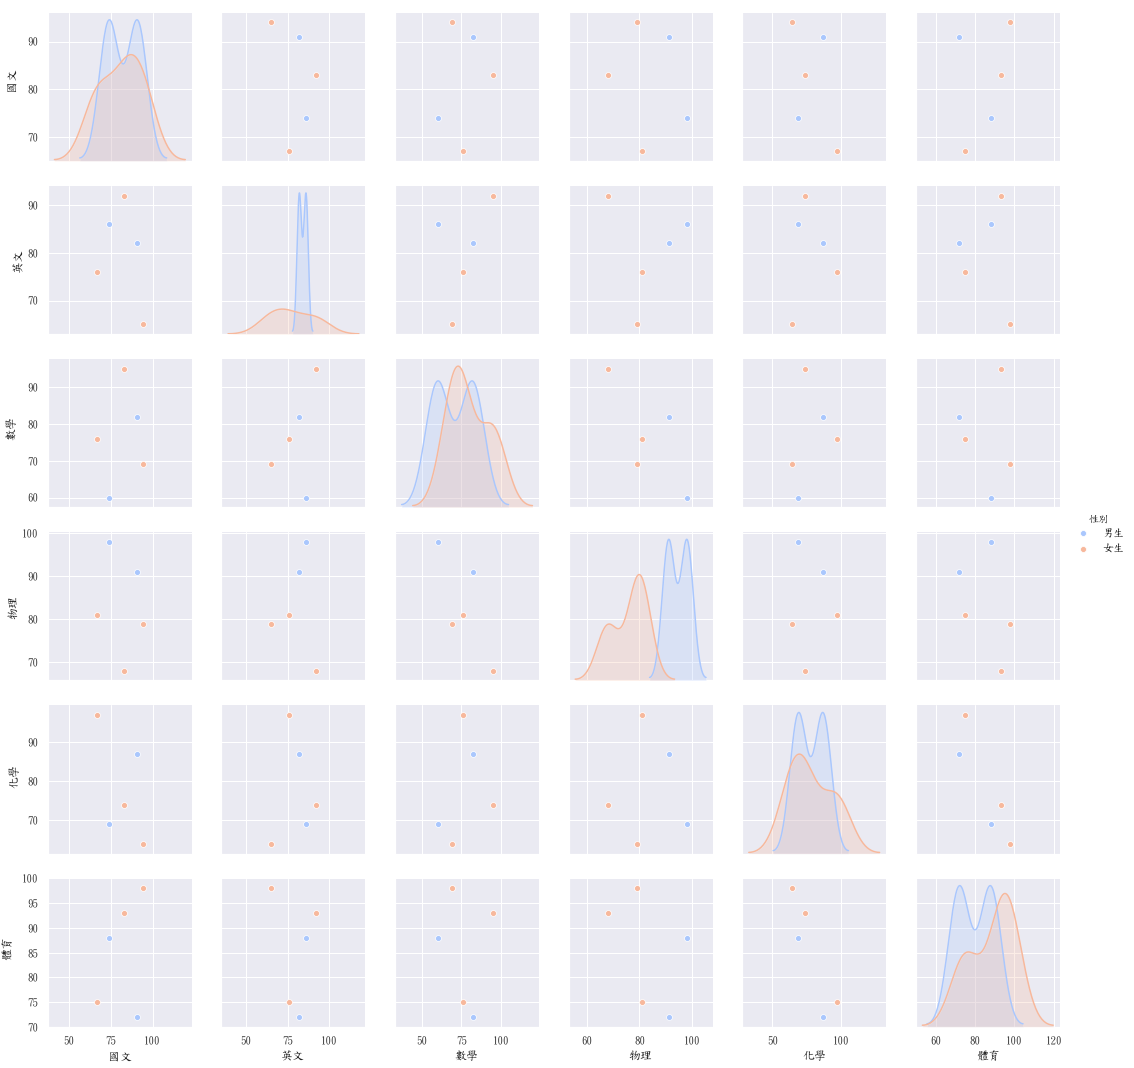

In [109]:
# 只有兩種分類的才能繪製 hue
sns.pairplot(df_grades, hue='性別',palette='coolwarm')

## rugplot
rugplots just draw a dash mark for every point on a univariate distribution.

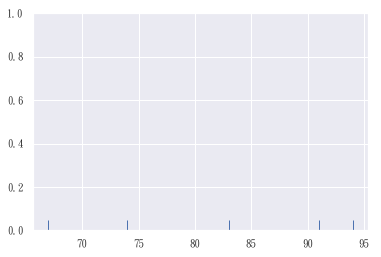

In [110]:
# 資料量級太少
sns.rugplot(df_grades['國文'])

## kdeplot
kdeplots are Kernel Density Estimation plots. These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value

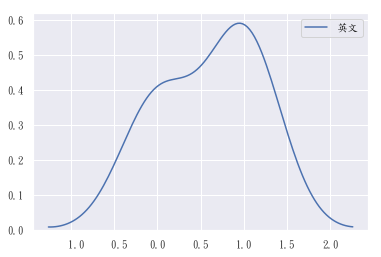

In [111]:
sns.kdeplot(df_grades["英文"]>80)

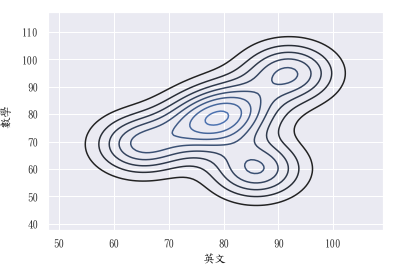

In [112]:
sns.kdeplot(df_grades["英文"], df_grades["數學"])

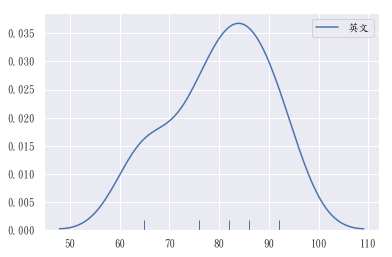

In [113]:
## layer of charts
sns.kdeplot(df_grades["英文"])
sns.rugplot(df_grades["英文"])

## matplotlib, seaborn in hist and distplot

(array([1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
        0., 0., 1.]),
 array([65.  , 66.35, 67.7 , 69.05, 70.4 , 71.75, 73.1 , 74.45, 75.8 ,
        77.15, 78.5 , 79.85, 81.2 , 82.55, 83.9 , 85.25, 86.6 , 87.95,
        89.3 , 90.65, 92.  ]),
 <a list of 20 Patch objects>)

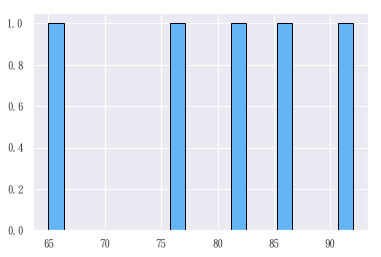

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# matplotlib histogram
plt.hist(df_grades['英文'], color = '#64B5F6', edgecolor = 'black', bins = int(100/5))

Text(0,0.5,'人數')

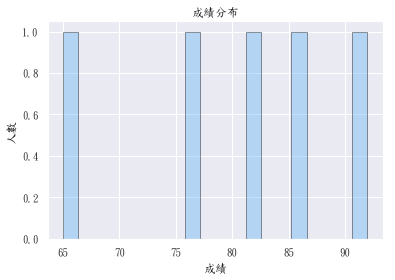

In [115]:
# seaborn histogram
sns.distplot(df_grades['英文'], hist=True, kde=False, 
             bins=int(100/5), color = '#64B5F6',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('成績分布')
plt.xlabel('成績')
plt.ylabel('人數')

## lmplot
This function combines regplot() and FacetGrid. It is intended as a convenient interface to fit regression models across conditional subsets of a dataset.

When thinking about how to assign variables to different facets, a general rule is that it makes sense to use hue for the most important comparison, followed by col and row. However, always think about your particular dataset and the goals of the visualization you are creating.

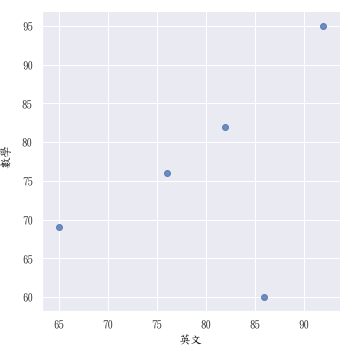

In [116]:
sns.lmplot('英文', '數學', data=df_grades, fit_reg=False)

## value_counts and plot

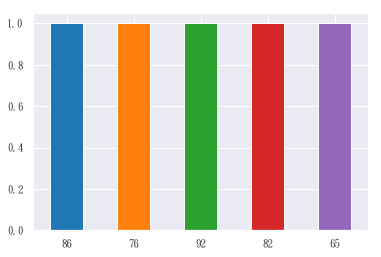

In [117]:
# 因為資料集少，統計各分數的人數，較無意義
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
df_grades['英文'].value_counts().plot(kind="bar", rot=0, color=colors)

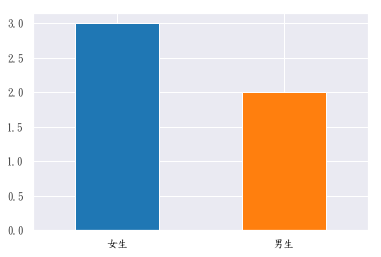

In [118]:
# 但性別的統計，因為只有兩類別，統計只有兩個 bar chart
df_grades['性別'].value_counts().plot(kind="bar", rot=0, color=colors)

## filter condition in DataFrame by using loc

In [119]:
# return type is DataFrame
df_grades.loc[df_grades['英文'] == 86].tail()

,國文,英文,數學,物理,化學,體育,性別
0,74,86,60,98,69,88,男生


In [120]:
df_grades.loc[df_grades['英文'] > 80].head()

,國文,英文,數學,物理,化學,體育,性別
0,74,86,60,98,69,88,男生
1,91,82,82,91,87,72,男生
2,83,92,95,68,74,93,女生


In [121]:
# usage as assign to selected DataFrame
filter_df = df_grades.loc[df_grades['英文'] > 80]
# for x in filter_df:
#     print(filter_df[x])

# Pick one of the record from DataFrame, and convert to Series
series1 = df_grades.loc[df_grades['英文'] > 80].iloc[0,:]
series1

國文    74
英文    86
數學    60
物理    98
化學    69
體育    88
性別    男生
Name: 0, dtype: object

## Categorical Data Plots
* factorplot
* boxplot
* violinplot
* stripplot
* swarmplot
* barplot
* countplot

## barplot and countplotPermalink
These plots allow to get aggregate data off a categorical feature in your data. barplot is a general plot that allows you to aggregate the categorical data based off some function, by default the mean. Count plot does the aggregation at counts

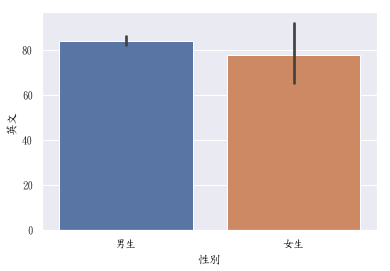

In [122]:
import seaborn as sns
%matplotlib inline

sns.barplot(x='性別', y='英文', data=df_grades)

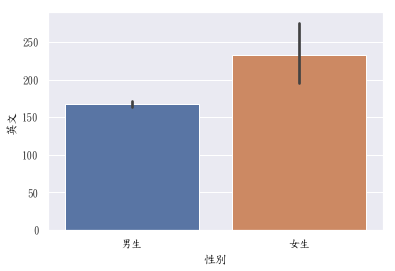

In [123]:
#using estimator we can override default aggregation type
import numpy as np
sns.barplot(x='性別', y='英文', data=df_grades, estimator=np.sum)

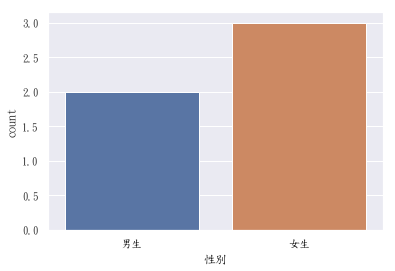

In [124]:
# 如果沒有設定 y，意即未指定科目
sns.countplot(x='性別', data=df_grades)

### boxplot and violinplot
boxplots and violinplots are used to shown the distribution of categorical data.
A box plot shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

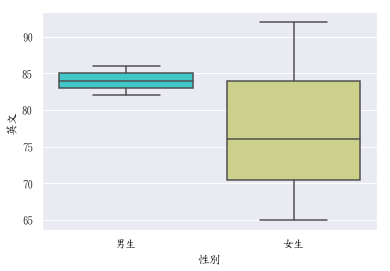

In [125]:
sns.boxplot(x='性別', y='英文', data=df_grades, palette='rainbow')

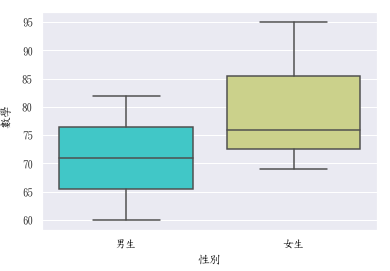

In [126]:
sns.boxplot(x='性別', y='數學', data=df_grades, palette='rainbow')

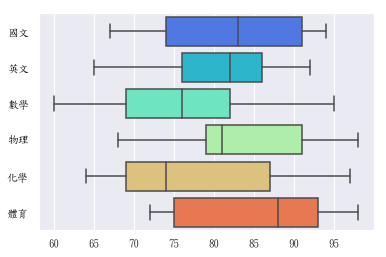

In [127]:
#To do the boxplot on entiredataframe
sns.boxplot(data=df_grades, palette='rainbow', orient='h')

In [128]:
# time to add time sequence data into our data set
# 但上張圖的分佈顯示，看不出哪個科目，所以改以 list of dictionary，多執行幾次這個cell產生更多學生成績
grades = []
student1 = {"日期":"2019-08-01","國文":74, "英文":86, "數學":60, "物理":98, "化學":69, "體育":88, "性別":"男生"}
student2 = {"日期":"2019-08-01","國文":91, "英文":82, "數學":82, "物理":91, "化學":87, "體育":72, "性別":"男生"}
student3 = {"日期":"2019-08-01","國文":83, "英文":92, "數學":95, "物理":68, "化學":74, "體育":93, "性別":"女生"}
student4 = {"日期":"2019-08-01","國文":67, "英文":76, "數學":76, "物理":81, "化學":97, "體育":75, "性別":"女生"}
student5 = {"日期":"2019-08-01","國文":94, "英文":65, "數學":69, "物理":79, "化學":64, "體育":98, "性別":"女生"}
grades.append(student1)
grades.append(student2)
grades.append(student3)
grades.append(student4)
grades.append(student5)
student1 = {"日期":"2019-08-02","國文":93, "英文":61, "數學":87, "物理":63, "化學":73, "體育":65, "性別":"男生"}
student2 = {"日期":"2019-08-02","國文":76, "英文":59, "數學":71, "物理":78, "化學":71, "體育":91, "性別":"男生"}
student3 = {"日期":"2019-08-02","國文":81, "英文":78, "數學":66, "物理":69, "化學":65, "體育":87, "性別":"女生"}
student4 = {"日期":"2019-08-02","國文":70, "英文":87, "數學":55, "物理":62, "化學":85, "體育":69, "性別":"女生"}
student5 = {"日期":"2019-08-02","國文":91, "英文":56, "數學":91, "物理":88, "化學":62, "體育":72, "性別":"女生"}
grades.append(student1)
grades.append(student2)
grades.append(student3)
grades.append(student4)
grades.append(student5)
df_grades = pd.DataFrame(grades)
df_grades

,日期,國文,英文,數學,物理,化學,體育,性別
0,2019-08-01,74,86,60,98,69,88,男生
1,2019-08-01,91,82,82,91,87,72,男生
2,2019-08-01,83,92,95,68,74,93,女生
3,2019-08-01,67,76,76,81,97,75,女生
4,2019-08-01,94,65,69,79,64,98,女生
5,2019-08-02,93,61,87,63,73,65,男生
6,2019-08-02,76,59,71,78,71,91,男生
7,2019-08-02,81,78,66,69,65,87,女生
8,2019-08-02,70,87,55,62,85,69,女生
9,2019-08-02,91,56,91,88,62,72,女生


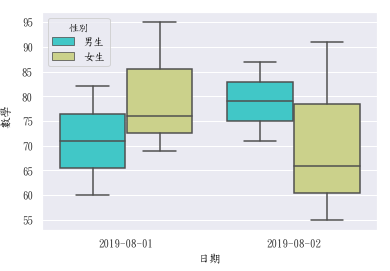

In [129]:
# to add another categor add hue
sns.boxplot(x='日期', y='數學', data=df_grades, palette='rainbow', hue='性別')

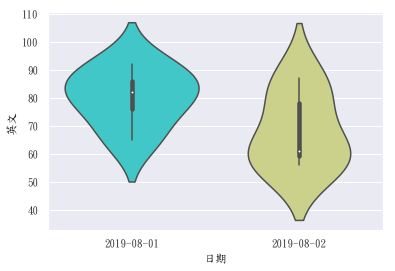

In [130]:
sns.violinplot(x='日期', y='英文', data=df_grades, palette='rainbow')

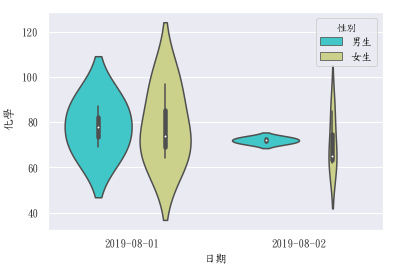

In [131]:
sns.violinplot(x='日期', y='化學', data=df_grades, palette='rainbow', hue='性別')

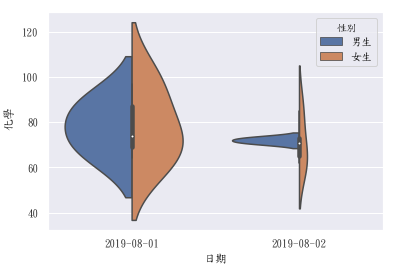

In [132]:
#use split to merge into 1
sns.violinplot(x="日期", y="化學", data=df_grades, hue='性別', split=True, platette='set1')

## stripplot and swarmplot
The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.
The swarmplot is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).

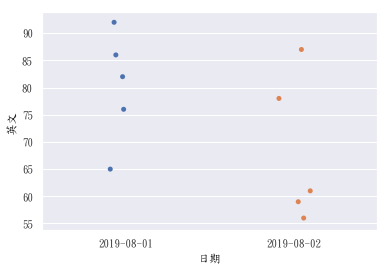

In [133]:
sns.stripplot(x="日期", y="英文", data=df_grades)

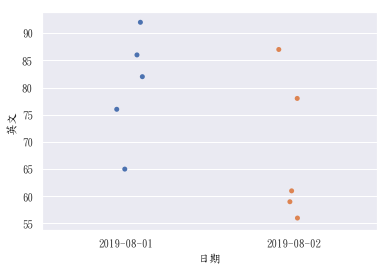

In [134]:
# Amount of jitter (only along the categorical axis) to apply. This can be useful when you have many points and they overlap, so that it is easier to see the distribution.
# You can specify the amount of jitter (half the width of the uniform random variable support), or just use True for a good default.
sns.stripplot(x="日期", y="英文", data=df_grades, jitter=True)

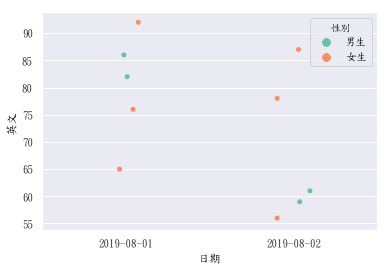

In [135]:
sns.stripplot(x="日期", y="英文", data=df_grades, jitter=True, hue='性別', palette='Set2')

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


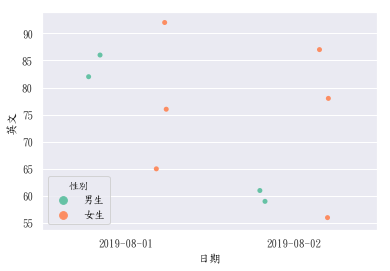

In [136]:
# 將性別區分開顯示於不同x軸區間
sns.stripplot(x="日期", y="英文", data=df_grades, jitter=True, hue='性別', palette='Set2', split=True)

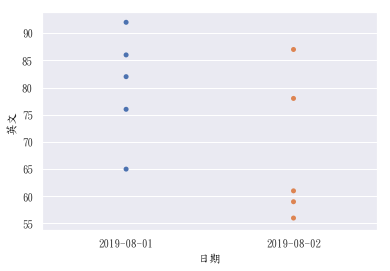

In [137]:
# swarmplot
# A categorical scatterplot where the points do not overlap. Can be used with other plots to show each observation.
sns.swarmplot(x="日期", y="英文", data=df_grades)

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:2974: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


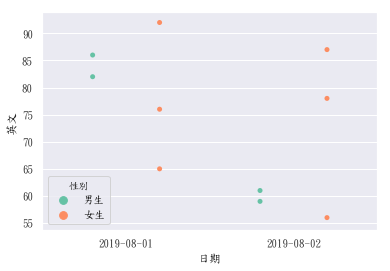

In [138]:
sns.swarmplot(x="日期", y="英文", hue='性別',data=df_grades, palette="Set2", split=True)

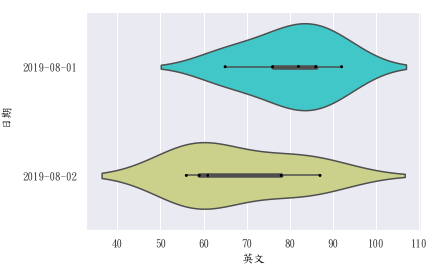

In [139]:
#Combining Categorical Plots
sns.violinplot(x="英文", y="日期", data=df_grades, palette='rainbow')
sns.swarmplot(x="英文", y="日期", data=df_grades, color='black', size=3)

# factorplot
factorplot is the most general form of a categorical plot. It can take in a kind parameter to adjust the plot type:

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


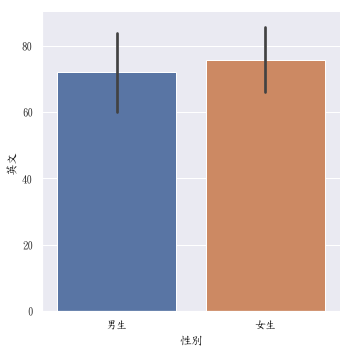

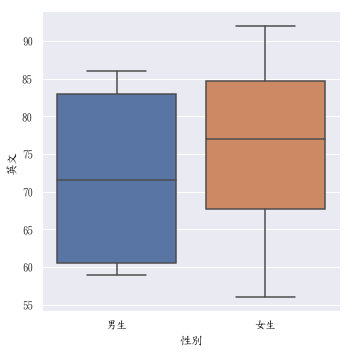

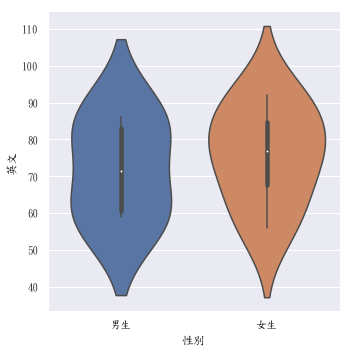

In [140]:
sns.factorplot(x='性別', y='英文', data=df_grades, kind='bar')
sns.factorplot(x='性別', y='英文', data=df_grades, kind='box')
sns.factorplot(x='性別', y='英文', data=df_grades, kind='violin')

## Heatmap
For Heatmap to work we need to convert the data in matrix form using corr fn or pivoting the data

In [141]:
# Matrix form for correlation data
tp = df_grades.corr()
tp

,國文,英文,數學,物理,化學,體育
國文,1.000000,-0.444288,0.553471,0.036463,-0.518109,-0.009570
英文,-0.444288,1.000000,-0.248500,-0.047231,0.418948,0.111082
數學,0.553471,-0.248500,1.000000,-0.020712,-0.060705,-0.161641
物理,0.036463,-0.047231,-0.020712,1.000000,-0.055726,0.148840
化學,-0.518109,0.418948,-0.060705,-0.055726,1.000000,-0.461976
體育,-0.009570,0.111082,-0.161641,0.148840,-0.461976,1.000000


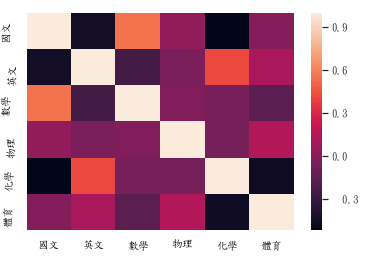

In [142]:
sns.heatmap(tp)

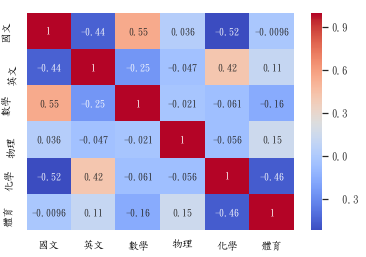

In [143]:
#use annot to show labels
sns.heatmap(df_grades.corr(), cmap='coolwarm', annot=True)

### pivot_table
有四個最重要的參數index、values、columns、aggfunc，本文以這四個參數為中心講解pivot操作是如何進行。

- Index
- 每個pivot_table必須擁有一個index，如果想查看男女生的數學成績，首先我們將性別設置為index：

In [144]:
# time to add time sequence data into our data set
# 但上張圖的分佈顯示，看不出哪個科目，所以改以 list of dictionary，多執行幾次這個cell產生更多學生成績
grades = []
student1 = {"日期":"2019-08-01","國文":74, "英文":86, "數學":60, "物理":98, "化學":69, "體育":88, "性別":"男生"}
student2 = {"日期":"2019-08-01","國文":91, "英文":82, "數學":82, "物理":91, "化學":87, "體育":72, "性別":"男生"}
student3 = {"日期":"2019-08-01","國文":83, "英文":92, "數學":95, "物理":68, "化學":74, "體育":93, "性別":"女生"}
student4 = {"日期":"2019-08-01","國文":67, "英文":76, "數學":76, "物理":81, "化學":97, "體育":75, "性別":"女生"}
student5 = {"日期":"2019-08-01","國文":94, "英文":65, "數學":69, "物理":79, "化學":64, "體育":98, "性別":"女生"}
grades.append(student1)
grades.append(student2)
grades.append(student3)
grades.append(student4)
grades.append(student5)
student1 = {"日期":"2019-09-02","國文":93, "英文":61, "數學":87, "物理":63, "化學":73, "體育":65, "性別":"男生"}
student2 = {"日期":"2019-09-02","國文":76, "英文":59, "數學":71, "物理":78, "化學":71, "體育":91, "性別":"男生"}
student3 = {"日期":"2019-09-02","國文":81, "英文":78, "數學":66, "物理":69, "化學":65, "體育":87, "性別":"女生"}
student4 = {"日期":"2019-09-02","國文":70, "英文":87, "數學":55, "物理":62, "化學":85, "體育":69, "性別":"女生"}
student5 = {"日期":"2019-09-02","國文":91, "英文":56, "數學":91, "物理":88, "化學":62, "體育":72, "性別":"女生"}
grades.append(student1)
grades.append(student2)
grades.append(student3)
grades.append(student4)
grades.append(student5)
df_grades = pd.DataFrame(grades)
df_grades

,日期,國文,英文,數學,物理,化學,體育,性別
0,2019-08-01,74,86,60,98,69,88,男生
1,2019-08-01,91,82,82,91,87,72,男生
2,2019-08-01,83,92,95,68,74,93,女生
3,2019-08-01,67,76,76,81,97,75,女生
4,2019-08-01,94,65,69,79,64,98,女生
5,2019-09-02,93,61,87,63,73,65,男生
6,2019-09-02,76,59,71,78,71,91,男生
7,2019-09-02,81,78,66,69,65,87,女生
8,2019-09-02,70,87,55,62,85,69,女生
9,2019-09-02,91,56,91,88,62,72,女生


In [145]:
# add column 月, 日 choose from DataFrame["日期"]
df_grades["月"] = df_grades["日期"].apply(lambda x: str(x)[5:7])
df_grades["日"] = df_grades["日期"].apply(lambda x: str(x)[8:10])
df_grades

,日期,國文,英文,數學,物理,化學,體育,性別,月,日
0,2019-08-01,74,86,60,98,69,88,男生,08,01
1,2019-08-01,91,82,82,91,87,72,男生,08,01
2,2019-08-01,83,92,95,68,74,93,女生,08,01
3,2019-08-01,67,76,76,81,97,75,女生,08,01
4,2019-08-01,94,65,69,79,64,98,女生,08,01
5,2019-09-02,93,61,87,63,73,65,男生,09,02
6,2019-09-02,76,59,71,78,71,91,男生,09,02
7,2019-09-02,81,78,66,69,65,87,女生,09,02
8,2019-09-02,70,87,55,62,85,69,女生,09,02
9,2019-09-02,91,56,91,88,62,72,女生,09,02


In [146]:
pvt = df_grades.pivot_table(values="英文", index='日', columns='月')

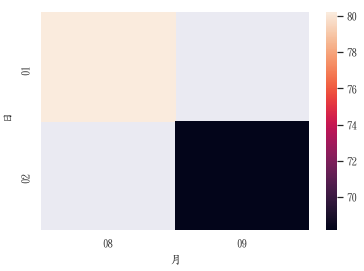

In [147]:
sns.heatmap(pvt)

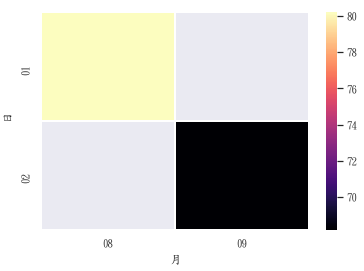

In [148]:
# use line color and line width to improve look and feel
sns.heatmap(pvt, cmap='magma', linecolor='white', linewidths=1)

## clustermap
The clustermap uses hierarchal clustering to produce a clustered version of the heatmap

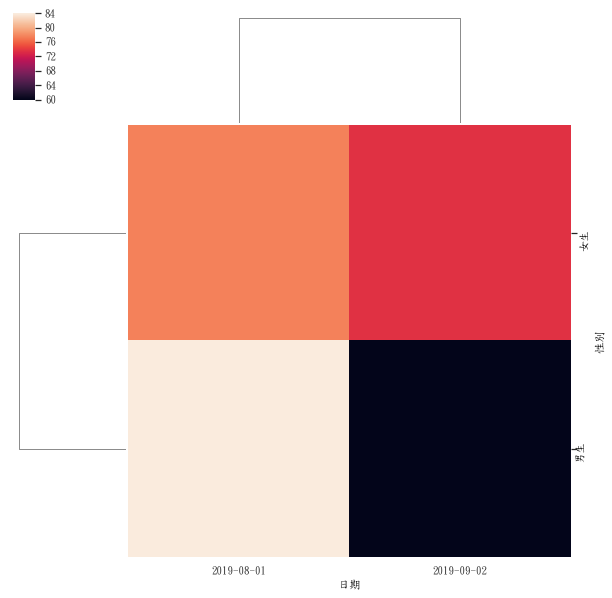

In [149]:
pvt = df_grades.pivot_table(values="英文", index='性別', columns='日期')

sns.clustermap(pvt)

D:\Anaconda3\lib\site-packages\seaborn\matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


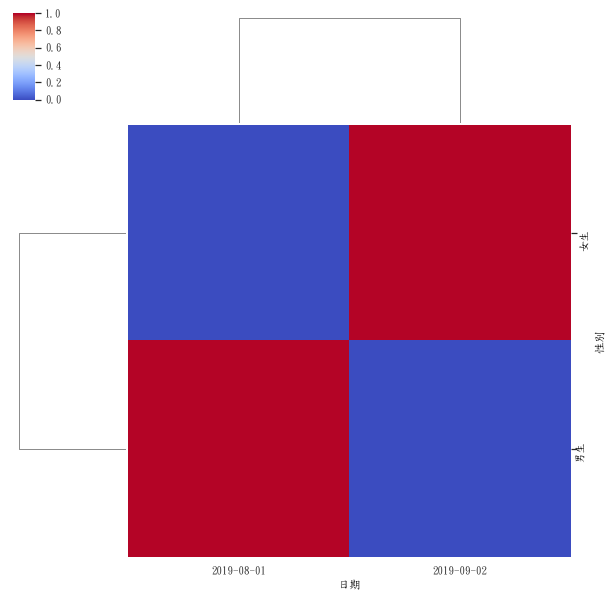

In [150]:
sns.clustermap(pvt, cmap='coolwarm', standard_scale=1)

### Regression Plots
lmplot allows you to display linear models, but it also conveniently allows you to split up those plots based off of features, as well as coloring the hue based off of features.

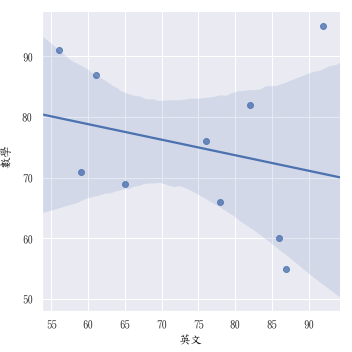

In [151]:
sns.lmplot(x='英文', y='數學', data=df_grades)

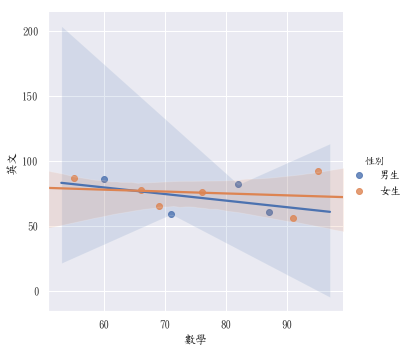

In [152]:
#adding another category
sns.lmplot(x='數學', y='英文', data=df_grades, hue='性別')

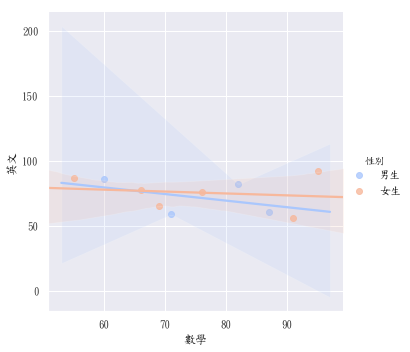

In [153]:
sns.lmplot(x='數學', y='英文', data=df_grades, hue='性別', palette='coolwarm')

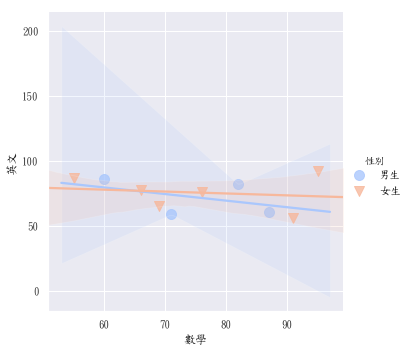

In [154]:
# specify markers to distinguish ,
sns.lmplot(x='數學', y='英文', data=df_grades, hue='性別', palette='coolwarm',markers=['o','v'], scatter_kws={'s':100})

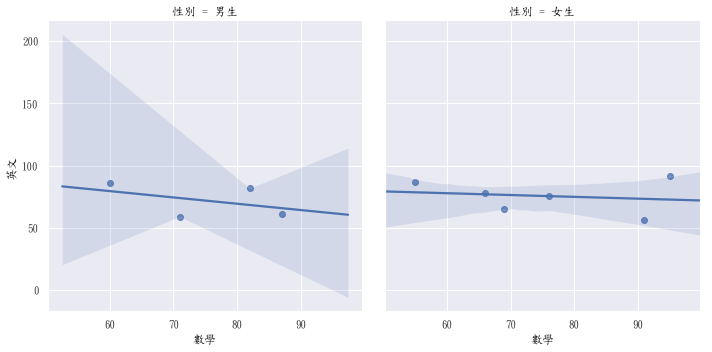

In [155]:
## Using a Grid
sns.lmplot(x='數學', y='英文', data=df_grades, col='性別')

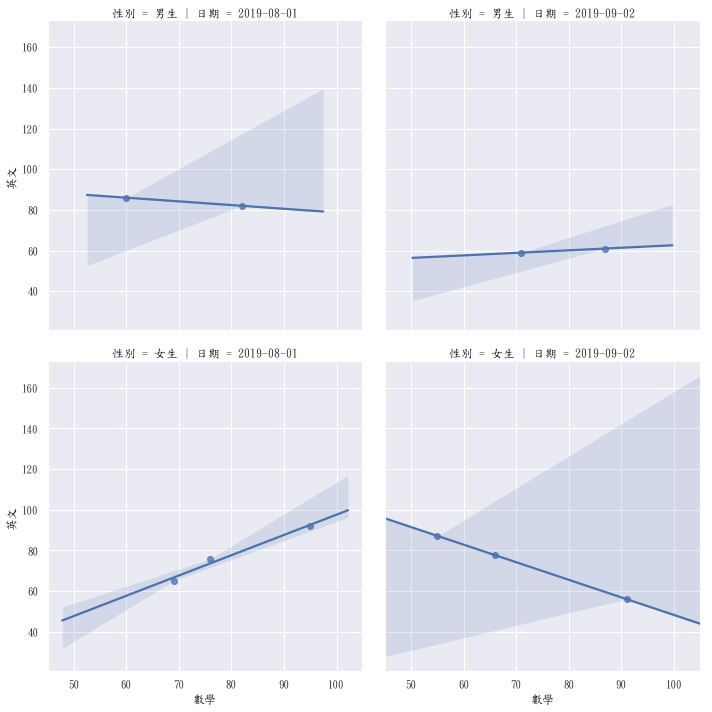

In [156]:
#provide row and column to lmplot
sns.lmplot(x="數學", y="英文", row="性別", col="日期", data=df_grades)

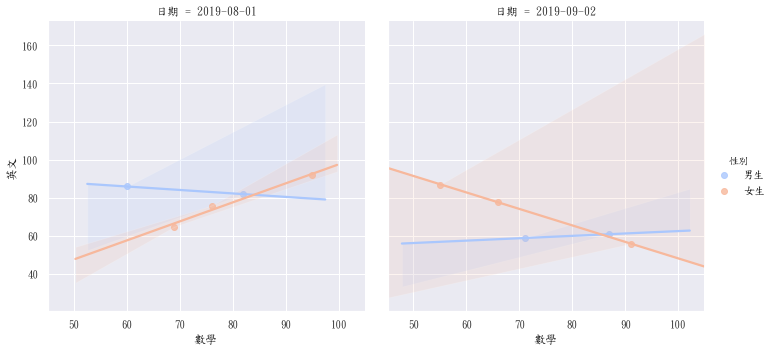

In [157]:
# plot for different days
sns.lmplot(x='數學', y='英文', data=df_grades, col='日期', hue='性別', palette='coolwarm')

D:\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


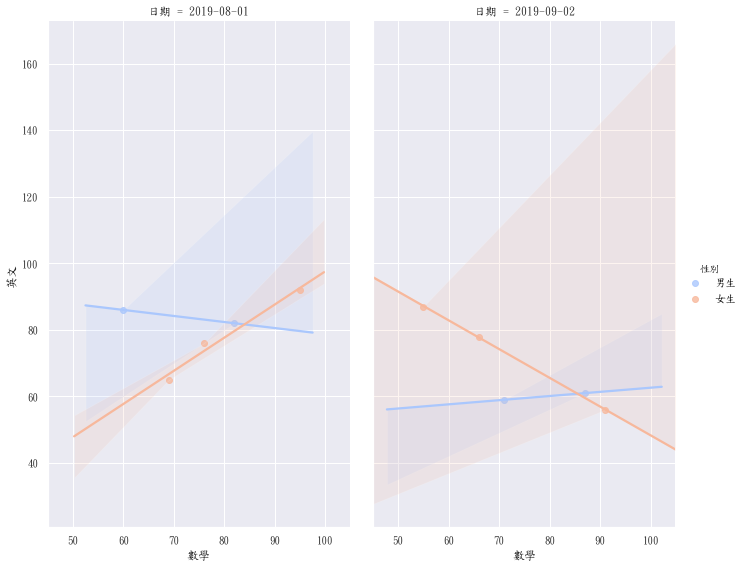

In [158]:
#adding aspect and size
sns.lmplot(x='數學',y='英文',data=df_grades, col='日期', hue='性別', palette='coolwarm', aspect=0.6,size=8)

## 班級成績練習

In [159]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\kaiu.ttf',size=14)
sns.set(font=myfont.get_name())
%matplotlib inline

# Read data from csv
df_grades = pd.read_csv("data/pandas_data/grades.csv")

#### 資料畫出來

要畫個圖很容易。

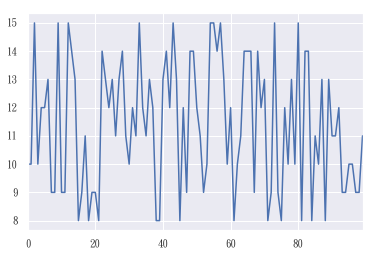

In [160]:
df_grades["英文"].plot()

當然, 在這個例子中, 其實畫 histogram 圖更有意義一點。

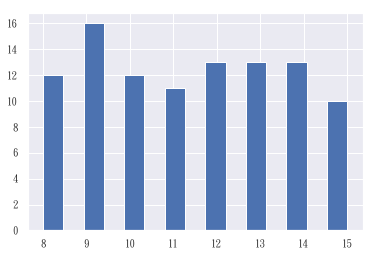

In [161]:
df_grades["英文"].hist(bins=15)

In [162]:
# 英文平均
df_grades["英文"].mean()

11.38

In [163]:
# 計算標準差
df_grades["英文"].std()

2.273163594480768

不如就該算的都幫我們算算...

In [164]:
df_grades.describe()

,國文,英文,數學,自然,社會
count,100.000000,100.000000,100.000000,100.00000,100.00000
mean,11.390000,11.380000,11.570000,11.03000,11.83000
std,2.196853,2.273164,2.310516,2.21772,2.48655
min,8.000000,8.000000,8.000000,8.00000,8.00000
25%,9.000000,9.000000,10.000000,9.00000,9.00000
50%,11.000000,11.000000,11.000000,11.00000,12.00000
75%,13.000000,13.000000,14.000000,13.00000,14.00000
max,15.000000,15.000000,15.000000,15.00000,15.00000


### 統計上常用的函數
- d1.count()          #非空元素計算
- d1.min()            #最小值
- d1.max()            #最大值
- d1.idxmin()         #最小值的位置，類似於R中的which.min函式
- d1.idxmax()         #最大值的位置，類似於R中的which.max函式
- d1.quantile(0.1)    #10%分位數
- d1.sum()            #求和
- d1.mean()           #均值
- d1.median()         #中位數
- d1.mode()           #眾數
- d1.var()            #方差
- d1.std()            #標準差
- d1.mad()            #平均絕對偏差
- d1.skew()           #偏度
- d1.kurt()           #峰度
- d1.describe()       #一次性輸出多個描述性統計指標

有些時候，大家很愛看的相關係數矩陣。

In [165]:
df_grades.corr()

,國文,英文,數學,自然,社會
國文,1.000000,0.160158,-0.310899,-0.110236,-0.028421
英文,0.160158,1.000000,0.025656,0.113929,-0.063512
數學,-0.310899,0.025656,1.000000,0.014371,0.041651
自然,-0.110236,0.113929,0.014371,1.000000,-0.156594
社會,-0.028421,-0.063512,0.041651,-0.156594,1.000000


只算兩科間的相關係數當然也可以。

In [166]:
df_grades["英文"].corr(df_grades["數學"])

0.0256555267407717

計算總級分。基本上就是挑出要算的部份 (我們的例子就是所有科目), 再來就是全部加起來。其實全部加起來有個模糊的地方: 要一列一列加起來 (0), 還是一行一行加起來 (1)。

In [167]:
df_grades["總級分"] = df_grades[["國文", "英文", "數學", "社會", "自然"]].sum(1)
df_grades.head()

,姓名,國文,英文,數學,自然,社會,性別,總級分
0,劉俊安,9,10,15,10,13,男生,57
1,胡玉華,10,10,10,8,9,男生,47
2,黃淑婷,13,15,8,11,14,女生,61
3,陳上紫,10,10,8,9,14,女生,51
4,崔靜成,13,12,14,12,13,男生,64


#### 某種主科加權

現在應用數學系可能想看:

    數學 x 1.5 + 英文
    
這樣的分數。怎麼算很容易。

In [168]:
df_grades["主科"] = df_grades["數學"] * 1.5 + df_grades["英文"]
df_grades.head()

,姓名,國文,英文,數學,自然,社會,性別,總級分,主科
0,劉俊安,9,10,15,10,13,男生,57,32.5
1,胡玉華,10,10,10,8,9,男生,47,25.0
2,黃淑婷,13,15,8,11,14,女生,61,27.0
3,陳上紫,10,10,8,9,14,女生,51,22.0
4,崔靜成,13,12,14,12,13,男生,64,33.0


#### 排排序

我們來看總級分最高的 10 位同學。

In [169]:
df_grades.sort_values(by=["總級分"], ascending=False).head(10)

,姓名,國文,英文,數學,自然,社會,性別,總級分,主科
80,施雅鈴,13,15,12,13,13,女生,66,33.0
12,李正偉,11,15,11,14,15,男生,66,31.5
54,陳怡潔,15,15,9,15,11,女生,65,28.5
25,蔡亦瑄,13,13,14,13,12,女生,65,34.0
57,胡淳茜,12,15,14,13,11,女生,65,36.0
37,曾怡君,11,12,15,13,14,女生,65,34.5
48,陳怡婷,15,14,12,9,15,女生,65,32.0
64,俞志峰,9,14,13,14,15,男生,65,33.5
83,李士賢,10,14,15,13,13,男生,65,36.5
87,趙偉希,10,13,14,13,15,男生,65,34.0


先看主科, 再比總級分!

In [170]:
df_grades.sort_values(by=["主科", "總級分"], ascending=False).head(10)

,姓名,國文,英文,數學,自然,社會,性別,總級分,主科
73,吳志遠,13,15,15,8,8,男生,59,37.5
83,李士賢,10,14,15,13,13,男生,65,36.5
57,胡淳茜,12,15,14,13,11,女生,65,36.0
36,詹威德,12,13,15,10,14,男生,64,35.5
70,葉儀依,9,13,15,8,14,女生,59,35.5
68,劉麗芬,8,14,14,14,14,女生,64,35.0
66,邱盈俊,10,14,14,13,8,男生,59,35.0
37,曾怡君,11,12,15,13,14,女生,65,34.5
24,陳竹伯,10,12,15,10,14,男生,61,34.5
76,周育霖,9,12,15,13,12,男生,61,34.5


### 篩選條件：數學 與 英文都滿級分的人 (AND)

In [171]:
df_grades[(df_grades["數學"]==15) & (df_grades["英文"]==15)]

,姓名,國文,英文,數學,自然,社會,性別,總級分,主科
73,吳志遠,13,15,15,8,8,男生,59,37.5


### 篩選條件：數學 或 英文都滿級分的人 (OR)

In [172]:
df_grades[(df_grades["數學"]==15) | (df_grades["英文"]==15)]

,姓名,國文,英文,數學,自然,社會,性別,總級分,主科
0,劉俊安,9,10,15,10,13,男生,57,32.5
2,黃淑婷,13,15,8,11,14,女生,61,27.0
9,郭雅惠,10,15,12,11,9,女生,57,33.0
12,李正偉,11,15,11,14,15,男生,66,31.5
24,陳竹伯,10,12,15,10,14,男生,61,34.5
33,王佳蓉,14,15,9,9,8,女生,55,28.5
36,詹威德,12,13,15,10,14,男生,64,35.5
37,曾怡君,11,12,15,13,14,女生,65,34.5
39,段冠廷,9,8,15,12,15,男生,59,30.5
43,林士茜,12,15,9,9,13,男生,58,28.5


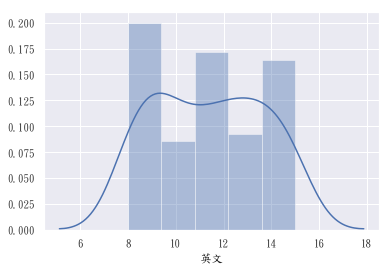

In [173]:
# 查看全班英文成績分布
sns.distplot(df_grades['英文'])

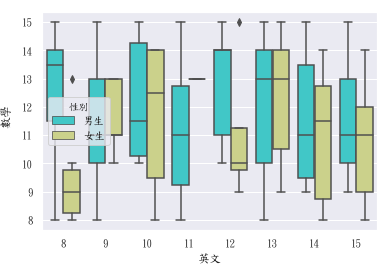

In [174]:
# to add another categor add hue
sns.boxplot(x='英文', y='數學', data=df_grades, palette='rainbow', hue='性別')

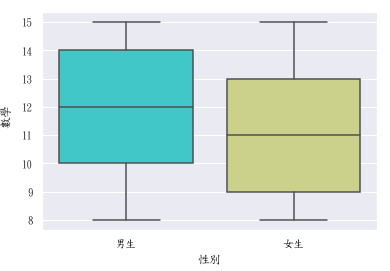

In [175]:
sns.boxplot(x='性別', y='數學', data=df_grades, palette='rainbow')

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


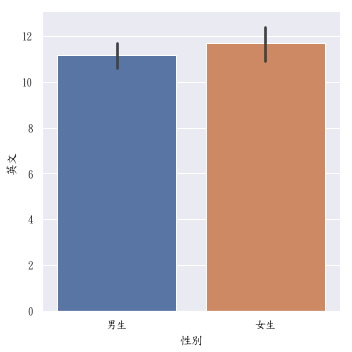

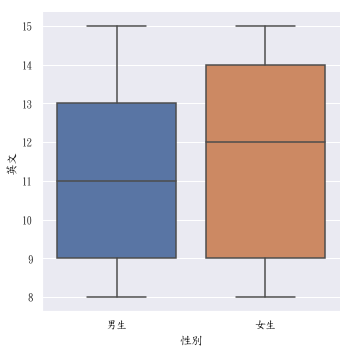

In [176]:
sns.factorplot(x='性別', y='英文', data=df_grades, kind='bar')
sns.factorplot(x='性別', y='英文', data=df_grades, kind='box')

In [177]:
# Matrix form for correlation data
tp = df_grades.corr()
tp

,國文,英文,數學,自然,社會,總級分,主科
國文,1.000000,0.160158,-0.310899,-0.110236,-0.028421,0.317865,-0.170141
英文,0.160158,1.000000,0.025656,0.113929,-0.063512,0.578324,0.563309
數學,-0.310899,0.025656,1.000000,0.014371,0.041651,0.379013,0.840426
自然,-0.110236,0.113929,0.014371,1.000000,-0.156594,0.390891,0.073639
社會,-0.028421,-0.063512,0.041651,-0.156594,1.000000,0.422178,-0.000005
總級分,0.317865,0.578324,0.379013,0.390891,0.422178,1.000000,0.626774
主科,-0.170141,0.563309,0.840426,0.073639,-0.000005,0.626774,1.000000


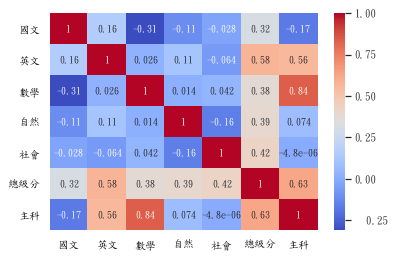

In [178]:
#use annot to show labels
sns.heatmap(df_grades.corr(), cmap='coolwarm', annot=True)

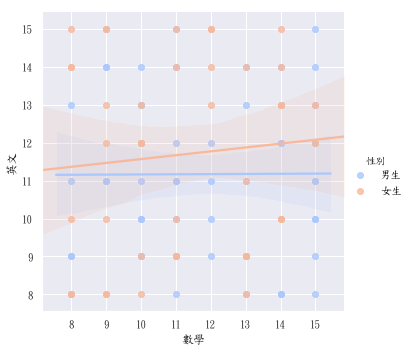

In [179]:
#adding another category
sns.lmplot(x='數學', y='英文', data=df_grades, hue='性別', palette='coolwarm')

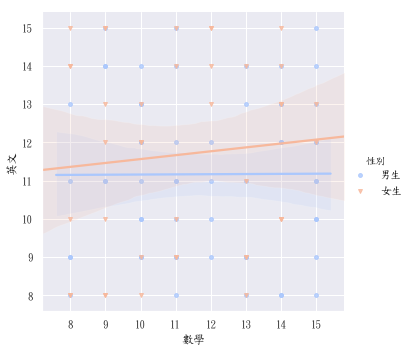

In [180]:
# specify markers to distinguish ,
sns.lmplot(x='數學', y='英文', data=df_grades, hue='性別', palette='coolwarm',markers=['o','v'], scatter_kws={'s':15})

## Google Play留言練習

In [181]:
import pandas as pd

# Read data from csv
df = pd.read_csv("data/pandas_data/google_play.csv")

In [182]:
df.head()

,no.,_id,comments,ratings
0,0,5d1ed5cf77f584ff6d739714,6/27好不容易等到更新了，結果左下個人資料點了會斷線重連的bug竟然還是沒修好，雖然硬要...,1
1,1,5d1ed5cf77f584ff6d739715,好玩 可是我手機名明明放在桌上 人物卻會一直亂跑 系統都判定我在開車...,5
2,2,5d1ed5cf77f584ff6d739716,花了錢買道具吸引怪，卻沒有吸引多少怪可以打，走好幾公里的路也沒打到幾隻怪，再這麽少怪，玩家...,1
3,3,5d1ed5cf77f584ff6d739717,等到更新後，仍然卡在「請眼觀四面耳聽八方」，無法進入遊戲。 手機是Sony XZ2. 真的...,1
4,4,5d1ed5cf77f584ff6d739718,我今天剛下載了這款遊戲，玩了一陣子後，我有點擊左下角的一個人物頭像，但是它顯示了無線網路發...,3


In [183]:
if 'no.' in df.columns:
    del df['no.']
df.head(1)

,_id,comments,ratings
0,5d1ed5cf77f584ff6d739714,6/27好不容易等到更新了，結果左下個人資料點了會斷線重連的bug竟然還是沒修好，雖然硬要...,1


In [184]:
if '_id' in df.columns:
    del df['_id']
df.head(1)

,comments,ratings
0,6/27好不容易等到更新了，結果左下個人資料點了會斷線重連的bug竟然還是沒修好，雖然硬要...,1


In [185]:
df["字數"] = df["comments"].apply(lambda x: len(x))
df.head()

,comments,ratings,字數
0,6/27好不容易等到更新了，結果左下個人資料點了會斷線重連的bug竟然還是沒修好，雖然硬要...,1,114
1,好玩 可是我手機名明明放在桌上 人物卻會一直亂跑 系統都判定我在開車...,5,38
2,花了錢買道具吸引怪，卻沒有吸引多少怪可以打，走好幾公里的路也沒打到幾隻怪，再這麽少怪，玩家...,1,74
3,等到更新後，仍然卡在「請眼觀四面耳聽八方」，無法進入遊戲。 手機是Sony XZ2. 真的...,1,65
4,我今天剛下載了這款遊戲，玩了一陣子後，我有點擊左下角的一個人物頭像，但是它顯示了無線網路發...,3,153


In [186]:
# rename column name into Chinese
df["評分"] = df["ratings"]
df["留言"] = df["comments"]
if 'comments' in df.columns:
    del df['comments']
if 'ratings' in df.columns:
    del df['ratings']
df.head()

,字數,評分,留言
0,114,1,6/27好不容易等到更新了，結果左下個人資料點了會斷線重連的bug竟然還是沒修好，雖然硬要...
1,38,5,好玩 可是我手機名明明放在桌上 人物卻會一直亂跑 系統都判定我在開車...
2,74,1,花了錢買道具吸引怪，卻沒有吸引多少怪可以打，走好幾公里的路也沒打到幾隻怪，再這麽少怪，玩家...
3,65,1,等到更新後，仍然卡在「請眼觀四面耳聽八方」，無法進入遊戲。 手機是Sony XZ2. 真的...
4,153,3,我今天剛下載了這款遊戲，玩了一陣子後，我有點擊左下角的一個人物頭像，但是它顯示了無線網路發...


## 視覺化分析 of Google Play comments

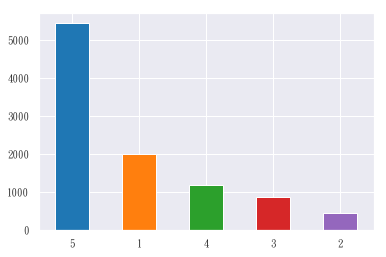

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
df['評分'].value_counts().plot(kind="bar", rot=0, color=colors)

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


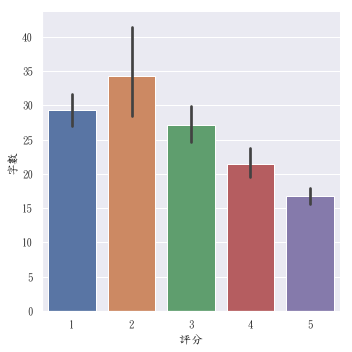

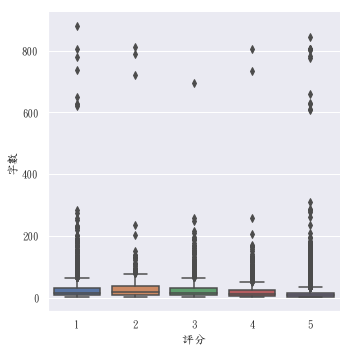

In [188]:
sns.factorplot(x='評分', y='字數', data=df, kind='bar')
sns.factorplot(x='評分', y='字數', data=df, kind='box')

### Bonus round

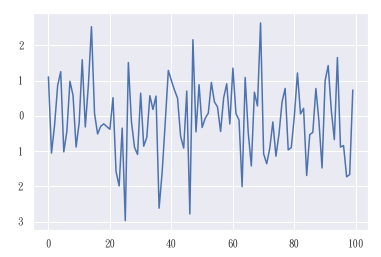

In [189]:
plt.plot(np.random.randn(100))